## Loading data

In [1]:
import pandas as pd
import numpy as np

chunksize = 100

list_of_dataframes = []

for df in pd.read_csv('ImputedScaledData.csv', chunksize=chunksize, index_col=0):
    list_of_dataframes.append(df)

result = pd.concat(list_of_dataframes)
df = result
df

AX-574114010  AX-564298109  AX-564298112  AX-574114011  AX-574114014  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0           2.0   
B-1002           0.0           0.0           0.0           0.0           2.0   
B-1003           0.0           0.0           0.0           1.0           1.0   
B-1005           0.0           0.0           0.0           2.0           2.0   
B-1006           0.0           0.0           0.0           2.0           2.0   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           0.0           1.0           2.0   
Y_991            1.0           1.0           0.0           0.0           2.0   
Y_992            0.0           0.0           0.0           1.0           1.0   
Y_995            0.0           0.0           0.0           0.0           2.0   
Y_998            2.0           2.0           0.0           0.0           2.0   

        AX-563423214  AX-575660822  AX-577073921  AX-564298209  AX-564298216  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0           0.0   
B-1002           0.0           0.0           2.0           2.0           0.0   
B-1003           0.0           0.0           0.0           1.0           0.0   
B-1005           0.0           0.0           2.0           1.0           0.0   
B-1006           0.0           0.0           2.0           2.0           0.0   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           1.0           0.0           0.0   
Y_991            0.0           0.0           0.0           0.0           0.0   
Y_992            0.0           0.0           2.0           0.0           0.0   
Y_995            0.0           0.0           0.0           0.0           0.0   
Y_998            0.0           0.0           0.0           0.0           0.0   

        ...  AX-574130077  AX-574130060  AX-574130061  AX-574130062       Pop  \
ID      ...                                                                     
B-1000  ...           0.0           0.0           0.0           0.0  Training   
B-1002  ...           0.0           0.0           0.0           0.0  Training   
B-1003  ...           0.0           0.0           0.0           0.0  Training   
B-1005  ...           0.0           0.0           0.0           0.0  Training   
B-1006  ...           0.0           0.0           0.0           0.0  Training   
...     ...           ...           ...           ...           ...       ...   
Y_988   ...           0.0           0.0           0.0           0.0  Training   
Y_991   ...           0.0           0.0           0.0           0.0  Training   
Y_992   ...           0.0           0.0           0.0           0.0  Training   
Y_995   ...           0.0           0.0           0.0           0.0  Training   
Y_998   ...           0.0           0.0           0.0           0.0  Training   

        Plate  Status    WWt   Group  Generation  
ID                                                
B-1000   RU11     0.0    NaN      F0          F0  
B-1002   RU10     0.0    NaN      F0          F0  
B-1003   RU10     0.0    NaN      F0          F0  
B-1005   RU11     0.0    NaN      F0          F0  
B-1006   RU10     1.0    NaN      F0          F0  
...       ...     ...    ...     ...         ...  
Y_988    RU28     1.0  12.73  FLGS23          F2  
Y_991    RU28     1.0  11.30  FLGS23          F2  
Y_992    RU28     0.0   9.48  FLGS23          F2  
Y_995    RU28     1.0   7.81  FLGS23          F2  
Y_998    RU28     1.0  10.54  FLGS23          F2  

[2423 rows x 65899 columns]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax_columns = [col for col in df.columns if col.startswith('AX')]
# len(ax_columns)
X = df[ax_columns]
y = df["Status"]
X = X.to_numpy()
y = y.to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y)
    
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.78322705, -0.7567372 , -0.0203195 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.78322705, -0.7567372 , -0.0203195 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.78322705, -0.7567372 , -0.0203195 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.78322705, -0.7567372 , -0.0203195 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.78322705, -0.7567372 , -0.0203195 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.91054037,  2.19113134, -0.0203195 , ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# MLP with GPU

In [4]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        # self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)

        # self.fc2 = nn.Linear(256, 64)
        # # self.bn2 = nn.BatchNorm1d(64)
        # self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)


In [5]:
def train_model(X_train, y_train, input_dim, X_val=None, y_val=None, epochs=50, batch_size=128, lr=0.005):
    X_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_tensor = torch.tensor(y_train, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=batch_size, shuffle=True)

    model = SimpleMLP(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum =0.1) 

    history = {"loss": [], "acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()

        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        history["loss"].append(avg_loss)
        history["acc"].append(accuracy)

        # Optional validation tracking
        if X_val is not None and y_val is not None:
            model.eval()
            with torch.no_grad():
                val_inputs = torch.tensor(X_val, dtype=torch.float32).to(device)
                val_labels = torch.tensor(y_val, dtype=torch.long).to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels).item()
                val_preds = torch.argmax(val_outputs, dim=1)
                val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())
                history["val_loss"].append(val_loss)
                history["val_acc"].append(val_acc)

                print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
        else:
            print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}")

    return model, history

In [20]:
def plot_history(history):
    epochs = range(1, len(history["loss"]) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["loss"], label='Train Loss')
    if history["val_loss"]: plt.plot(epochs, history["val_loss"], label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["acc"], label='Train Accuracy')
    if history["val_acc"]: plt.plot(epochs, history["val_acc"], label='Val Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [18]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32).to(device)
        labels = torch.tensor(y_test, dtype=torch.long).to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        acc = accuracy_score(labels.cpu(), preds.cpu())
        report = classification_report(labels.cpu(), preds.cpu())
        print("\nTest Accuracy:", acc)
        print("Classification Report:\n", report)


Epoch 1: Loss = 0.6739, Acc = 0.5574, Val Loss = 0.6899, Val Acc = 0.5773
Epoch 2: Loss = 0.5104, Acc = 0.7761, Val Loss = 0.6900, Val Acc = 0.5438
Epoch 3: Loss = 0.4209, Acc = 0.8548, Val Loss = 0.7007, Val Acc = 0.5258
Epoch 4: Loss = 0.3418, Acc = 0.9155, Val Loss = 0.6973, Val Acc = 0.5490
Epoch 5: Loss = 0.2914, Acc = 0.9406, Val Loss = 0.7019, Val Acc = 0.5541
Epoch 6: Loss = 0.2486, Acc = 0.9606, Val Loss = 0.7217, Val Acc = 0.5644
Epoch 7: Loss = 0.2096, Acc = 0.9755, Val Loss = 0.7331, Val Acc = 0.5567
Epoch 8: Loss = 0.1821, Acc = 0.9839, Val Loss = 0.7241, Val Acc = 0.5644
Epoch 9: Loss = 0.1589, Acc = 0.9890, Val Loss = 0.7394, Val Acc = 0.5670
Epoch 10: Loss = 0.1348, Acc = 0.9923, Val Loss = 0.7476, Val Acc = 0.5876
Epoch 11: Loss = 0.1227, Acc = 0.9961, Val Loss = 0.7663, Val Acc = 0.5773
Epoch 12: Loss = 0.1058, Acc = 0.9942, Val Loss = 0.7588, Val Acc = 0.5825
Epoch 13: Loss = 0.0973, Acc = 0.9968, Val Loss = 0.7701, Val Acc = 0.5670
Epoch 14: Loss = 0.0895, Acc = 0.9

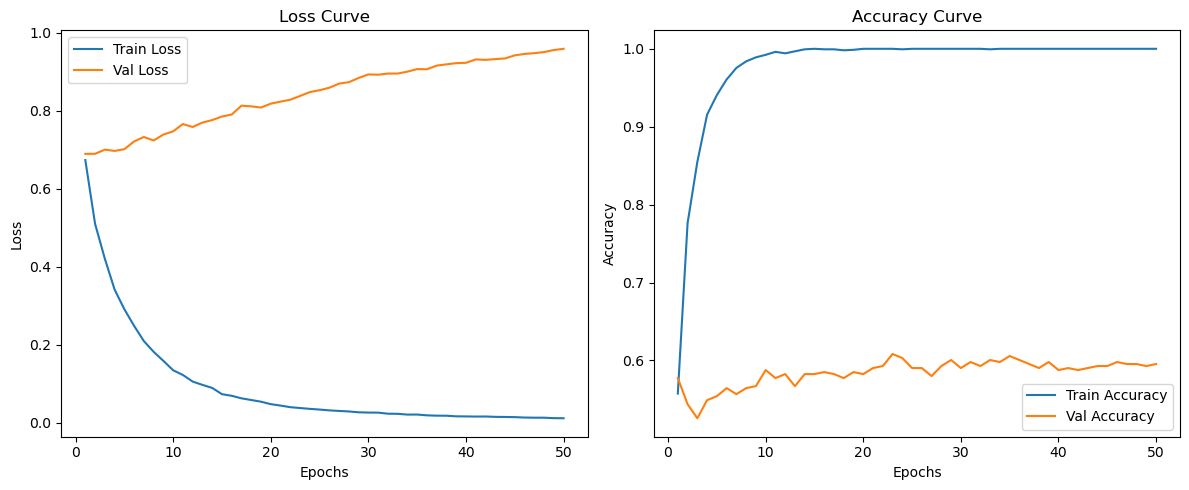

: 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

model, history = train_model(X_train_split, y_train_split, input_dim=X.shape[1], X_val=X_val, y_val=y_val, epochs=50)
# model.load_state_dict(torch.load("best_model.pth"))
evaluate_model(model, X_test, y_test)
plot_history(history)


## Dimensionality reduction MLP

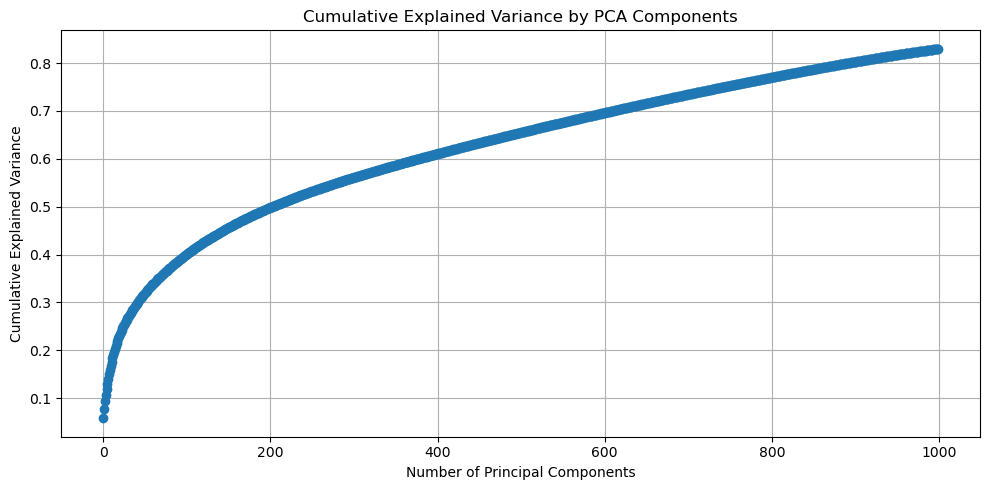

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)
# X_pca

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
class PCAMLP(nn.Module):
    def __init__(self, input_dim):
        super(PCAMLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        # self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.1)

        # self.fc2 = nn.Linear(256, 64)
        # # self.bn2 = nn.BatchNorm1d(64)
        # self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)


In [22]:
def train_model(X_train, y_train, input_dim, X_val=None, y_val=None, epochs=50, batch_size=128, lr=0.005):
    X_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_tensor = torch.tensor(y_train, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=batch_size, shuffle=True)

    model = PCAMLP(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    # optimizer = optim.SGD(model.parameters(), lr=lr, momentum = 0.5) 
    optimizer = optim.Adam(model.parameters(), lr=lr) 

    history = {"loss": [], "acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()

        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        history["loss"].append(avg_loss)
        history["acc"].append(accuracy)

        # Optional validation tracking
        if X_val is not None and y_val is not None:
            model.eval()
            with torch.no_grad():
                val_inputs = torch.tensor(X_val, dtype=torch.float32).to(device)
                val_labels = torch.tensor(y_val, dtype=torch.long).to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels).item()
                val_preds = torch.argmax(val_outputs, dim=1)
                val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())
                history["val_loss"].append(val_loss)
                history["val_acc"].append(val_acc)

                print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
        else:
            print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}")

    return model, history

Epoch 1: Loss = 1.5777, Acc = 0.5852, Val Loss = 0.9134, Val Acc = 0.5979
Epoch 2: Loss = 0.5485, Acc = 0.7897, Val Loss = 1.8421, Val Acc = 0.5515
Epoch 3: Loss = 0.3563, Acc = 0.8923, Val Loss = 1.6895, Val Acc = 0.5490
Epoch 4: Loss = 0.1409, Acc = 0.9439, Val Loss = 1.9738, Val Acc = 0.5722
Epoch 5: Loss = 0.0768, Acc = 0.9761, Val Loss = 2.5923, Val Acc = 0.5438
Epoch 6: Loss = 0.0432, Acc = 0.9832, Val Loss = 3.0346, Val Acc = 0.5515
Epoch 7: Loss = 0.0936, Acc = 0.9723, Val Loss = 3.2285, Val Acc = 0.5412
Epoch 8: Loss = 0.0457, Acc = 0.9845, Val Loss = 3.4414, Val Acc = 0.5490
Epoch 9: Loss = 0.0304, Acc = 0.9890, Val Loss = 3.7965, Val Acc = 0.5490
Epoch 10: Loss = 0.0404, Acc = 0.9858, Val Loss = 3.9497, Val Acc = 0.5722
Epoch 11: Loss = 0.0365, Acc = 0.9890, Val Loss = 4.2909, Val Acc = 0.5696
Epoch 12: Loss = 0.1165, Acc = 0.9852, Val Loss = 4.4793, Val Acc = 0.5619
Epoch 13: Loss = 0.1639, Acc = 0.9768, Val Loss = 4.3894, Val Acc = 0.5619
Epoch 14: Loss = 0.0967, Acc = 0.9

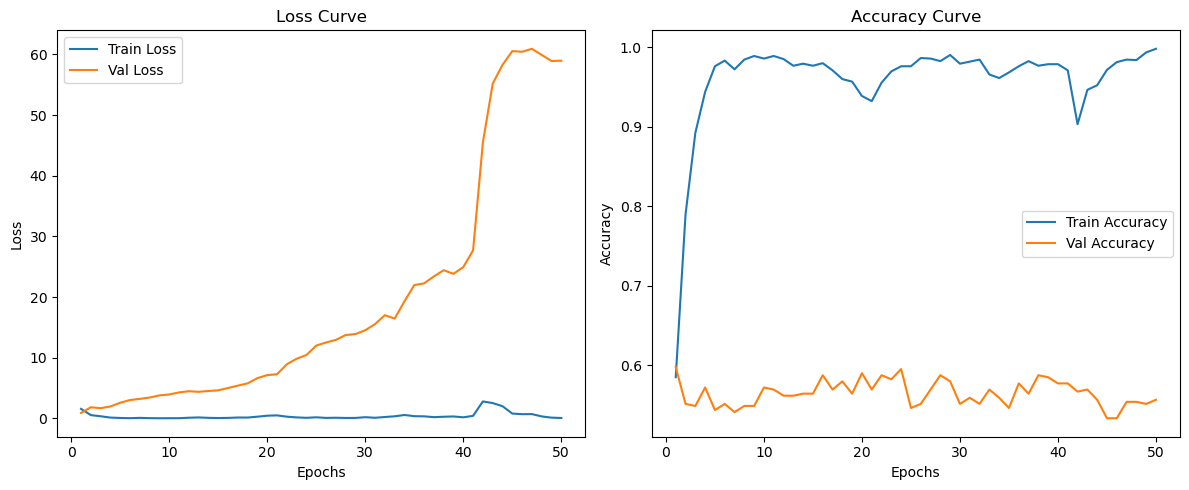

In [23]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_split_pca, X_val_pca, y_train_split_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.2, random_state=42)

model, history = train_model(X_train_split_pca, y_train_split_pca, input_dim=X_pca.shape[1], X_val=X_val_pca, y_val=y_val_pca, epochs=50)
evaluate_model(model, X_test_pca, y_test_pca)
plot_history(history)


## CNN

In [9]:
class ConvNN(torch.nn.Module):

    def __init__(self, input_length, num_classes=2, kernel_size=50, pool_size=10):
        super().__init__()
        self.conv1 = nn.Conv1d(
            in_channels=1,
            out_channels=32,
            kernel_size=kernel_size,
            stride=1
        )
        self.pool = nn.MaxPool1d(kernel_size=pool_size)
        conv_output_length = ((input_length - kernel_size + 1) // pool_size)
        self.fc = nn.Linear(32 * conv_output_length, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1) 
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)
        return x



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)

X_temp, X_test, y_temp, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

batch_size = 64
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size)

# --- Training Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvNN(input_length=X.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# --- Training Loop ---
epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()

    train_loss = total_loss / len(train_loader.dataset)
    train_acc = correct / len(train_loader.dataset)

    # --- Validation ---
    model.eval()
    val_correct = 0
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / len(val_loader.dataset)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f} | Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")

# --- Final Test Evaluation ---
model.eval()
test_correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        test_correct += (preds == labels).sum().item()

test_acc = test_correct / len(test_loader.dataset)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1: Train Loss = 28.3817, Train Acc = 0.5194 | Val Loss = 0.7307, Val Acc = 0.5645
Epoch 2: Train Loss = 0.6892, Train Acc = 0.5589 | Val Loss = 0.7357, Val Acc = 0.5516
Epoch 3: Train Loss = 0.6570, Train Acc = 0.5839 | Val Loss = 0.7254, Val Acc = 0.5548
Epoch 4: Train Loss = 0.6360, Train Acc = 0.6266 | Val Loss = 0.7276, Val Acc = 0.5419
Epoch 5: Train Loss = 0.6153, Train Acc = 0.6677 | Val Loss = 0.7450, Val Acc = 0.5290
Epoch 6: Train Loss = 0.5888, Train Acc = 0.6871 | Val Loss = 0.7364, Val Acc = 0.5452
Epoch 7: Train Loss = 0.5507, Train Acc = 0.7258 | Val Loss = 0.7716, Val Acc = 0.5032
Epoch 8: Train Loss = 0.4932, Train Acc = 0.7863 | Val Loss = 0.7643, Val Acc = 0.5581
Epoch 9: Train Loss = 0.4093, Train Acc = 0.8419 | Val Loss = 0.8227, Val Acc = 0.5484
Epoch 10: Train Loss = 0.2985, Train Acc = 0.9024 | Val Loss = 0.9097, Val Acc = 0.5516
Epoch 11: Train Loss = 0.1850, Train Acc = 0.9621 | Val Loss = 1.3042, Val Acc = 0.5000
Epoch 12: Train Loss = 0.1568, Train Acc